# Object Detection in an Image
## Using the Python's library imageAI.

In [1]:
# Python's version used: 3.6.8 64 bit
# pip install tensorflow==1.5.0
# pip install opencv-python
# pip install keras==2.1.5
# pip install imageai --upgrade
from imageai.Detection import ObjectDetection
from PIL import Image  
import os  


Using TensorFlow backend.


In [2]:
# Changing the current directory in the one of the .py file
os.chdir(os.path.dirname(__file__))
# Saving the current directory's path
execution_path = os.getcwd()


In [3]:
# Creating the detector model through YOLO
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
# Path of the YOLO's file
detector.setModelPath(os.path.join(execution_path, "Resources/yolo.h5"))
detector.loadModel()


In [4]:
# Converting the original image in a .png file
im = Image.open("Resources/Test.webp").convert("RGB")
im.save("Test.png", "png")


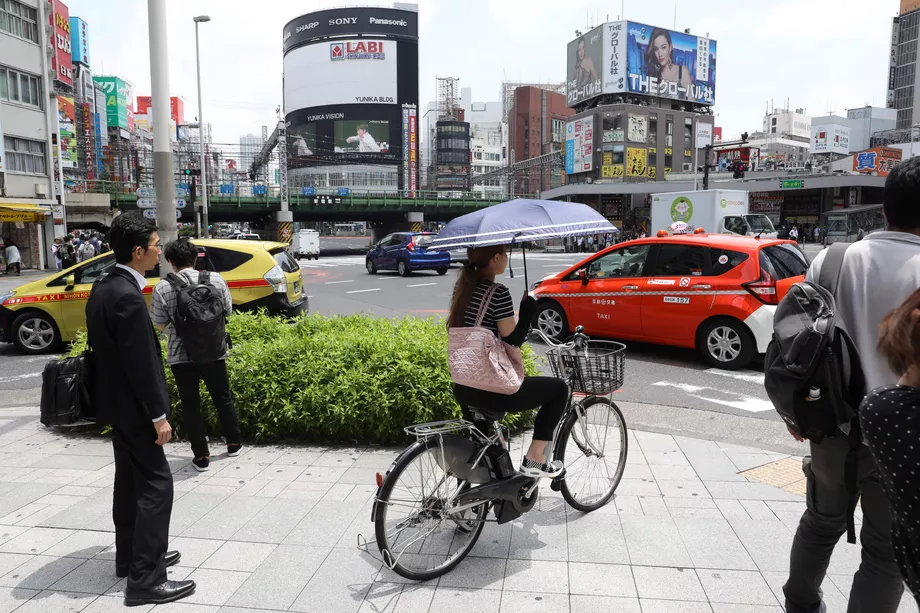

In [5]:
# Showing the original image
from IPython.display import Image
Image(filename='Test.png')


In [6]:
# Applying the model
detections = detector.detectObjectsFromImage(
    # Input image
    input_image=os.path.join(execution_path, "Test.png"),
    # Output image
    output_image_path=os.path.join(execution_path, "Output.png"),
    # Put True if you want the percentage to be displayed in the output image
    display_percentage_probability=False)


In [7]:
# Priting the list of the detections
print("--------------------------------")
for eachObject in detections:
    print(eachObject["name"], " : ", eachObject["percentage_probability"])
    print("--------------------------------")


--------------------------------
handbag  :  58.5419237613678
--------------------------------
umbrella  :  82.83088207244873
--------------------------------
backpack  :  60.23281216621399
--------------------------------
car  :  84.06585454940796
--------------------------------
car  :  95.75709104537964
--------------------------------
car  :  99.96958374977112
--------------------------------
bicycle  :  99.3398368358612
--------------------------------
person  :  68.84932518005371
--------------------------------
person  :  94.64009404182434
--------------------------------
person  :  96.94454073905945
--------------------------------
person  :  99.03849363327026
--------------------------------
person  :  99.78076219558716
--------------------------------


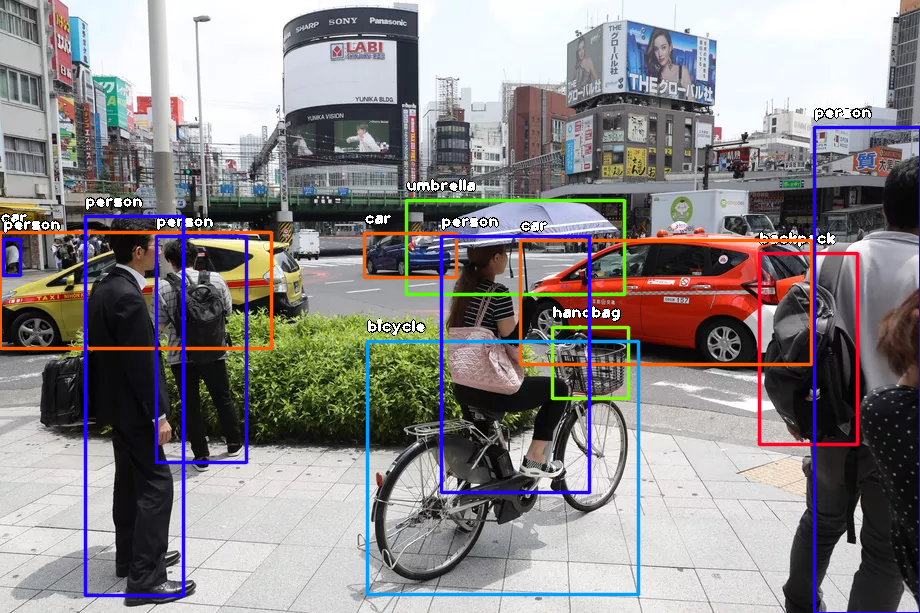

In [8]:
# Showing the image with the detections
from IPython.display import Image
Image(filename='Output.png')


In [9]:
# Now we want to detect only the umbrella in the image
custom_objects = detector.CustomObjects(umbrella=True)


In [10]:
# Applying the new model
detector.detectCustomObjectsFromImage(
    # Objects to detect
    custom_objects=custom_objects,
    # Input image
    input_image=os.path.join(execution_path, "Test.png"),
    # Output image
    output_image_path=os.path.join(execution_path, "Output2.png"),
    # Minimum percentage for the objects' discrimination
    minimum_percentage_probability=30)


[{'name': 'umbrella',
  'percentage_probability': 82.83088207244873,
  'box_points': [406, 200, 624, 294]}]

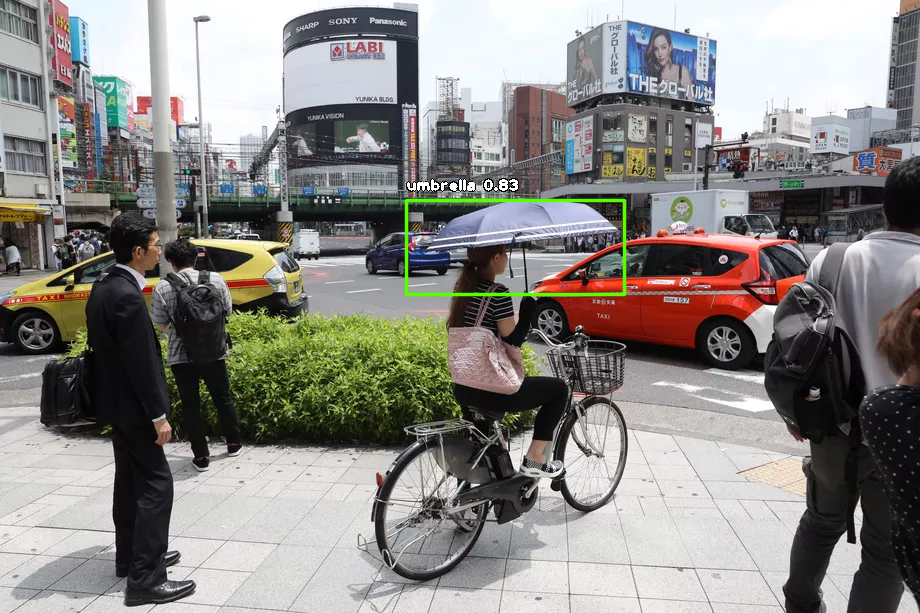

In [11]:
# Showing the image with the umbrella detection
from IPython.display import Image
Image(filename='Output2.png')


In [12]:
# Deleting the created images
file_path = 'Test.png'
os.remove(file_path)
file_path = 'Output.png'
os.remove(file_path)
file_path = 'Output2.png'
os.remove(file_path)
